<a href="https://colab.research.google.com/github/ubermenchh/learnpytorch/blob/main/nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ubermenchh/learnpytorch.git
%cd learnpytorch

Cloning into 'learnpytorch'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 124.09 KiB | 13.79 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/learnpytorch


# PyTorch Neural Network Classification

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=69)

In [3]:
X[:5], y[:5]

(array([[-0.51839217, -0.66522091],
        [ 0.78398275, -0.00098577],
        [ 0.12616247, -0.75963138],
        [-0.70384469, -0.32717022],
        [ 0.67524498, -0.34785267]]),
 array([1, 1, 1, 1, 1]))

In [4]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], 'label': y})
circles.head(10)

,X1,X2,label
0,-0.518392,-0.665221,1
1,0.783983,-0.000986,1
2,0.126162,-0.759631,1
3,-0.703845,-0.327170,1
4,0.675245,-0.347853,1
5,-0.750599,-0.141688,1
6,0.721272,-0.431657,1
7,-0.625116,0.572249,1
8,0.983314,0.248923,0
9,0.251079,0.962878,0


In [5]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

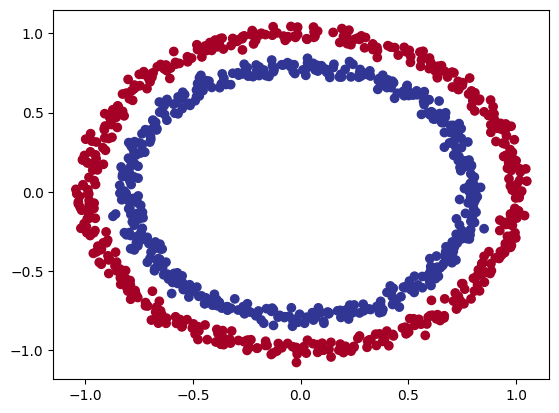

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [7]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:10], y[:10]

(tensor([[-0.5184, -0.6652],
         [ 0.7840, -0.0010],
         [ 0.1262, -0.7596],
         [-0.7038, -0.3272],
         [ 0.6752, -0.3479],
         [-0.7506, -0.1417],
         [ 0.7213, -0.4317],
         [-0.6251,  0.5722],
         [ 0.9833,  0.2489],
         [ 0.2511,  0.9629]]),
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 0., 0.]))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [9]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [10]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer2(self.layer1(x))

In [11]:
model0 = CircleModelV0().to(device)
model0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
model0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
untrained_preds = model0(X_test.to(device))
len(untrained_preds)

200

In [14]:
untrained_preds[:10], y_test[:10]

(tensor([[ 0.2266],
         [ 0.1383],
         [-0.3082],
         [-0.1665],
         [ 0.0193],
         [-0.0418],
         [-0.2094],
         [-0.7267],
         [ 0.1089],
         [-0.7375]], device='cuda:0', grad_fn=<SliceBackward0>),
 tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0.]))

In [15]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

In [16]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [17]:
y_logits = model0(X_test.to(device))[:5]
y_logits

tensor([[ 0.2266],
        [ 0.1383],
        [-0.3082],
        [-0.1665],
        [ 0.0193]], device='cuda:0', grad_fn=<SliceBackward0>)

In [18]:
y_pred_prods = torch.sigmoid(y_logits)
y_pred_prods

tensor([[0.5564],
        [0.5345],
        [0.4235],
        [0.4585],
        [0.5048]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [19]:
y_preds = torch.round(y_pred_prods)
y_pred_labels = torch.round(torch.sigmoid(model0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [20]:
y_test[:5]

tensor([0., 0., 0., 0., 0.])

In [21]:
torch.manual_seed(69)

epochs = 100

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model0.train()
    y_logits = model0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model0.eval()
    with torch.inference_mode():
        test_logits = model0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.2f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.2f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71 | Accuracy: 47.62% | Test Loss: 0.73 | Test Accuracy: 44.50%
Epoch: 10 | Loss: 0.70 | Accuracy: 48.38% | Test Loss: 0.72 | Test Accuracy: 48.50%
Epoch: 20 | Loss: 0.70 | Accuracy: 49.38% | Test Loss: 0.71 | Test Accuracy: 48.00%
Epoch: 30 | Loss: 0.70 | Accuracy: 50.00% | Test Loss: 0.71 | Test Accuracy: 47.50%
Epoch: 40 | Loss: 0.70 | Accuracy: 50.50% | Test Loss: 0.71 | Test Accuracy: 47.00%
Epoch: 50 | Loss: 0.70 | Accuracy: 50.38% | Test Loss: 0.70 | Test Accuracy: 47.00%
Epoch: 60 | Loss: 0.70 | Accuracy: 50.38% | Test Loss: 0.70 | Test Accuracy: 47.00%
Epoch: 70 | Loss: 0.70 | Accuracy: 50.50% | Test Loss: 0.70 | Test Accuracy: 47.00%
Epoch: 80 | Loss: 0.69 | Accuracy: 50.50% | Test Loss: 0.70 | Test Accuracy: 47.50%
Epoch: 90 | Loss: 0.69 | Accuracy: 50.38% | Test Loss: 0.70 | Test Accuracy: 47.00%


In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

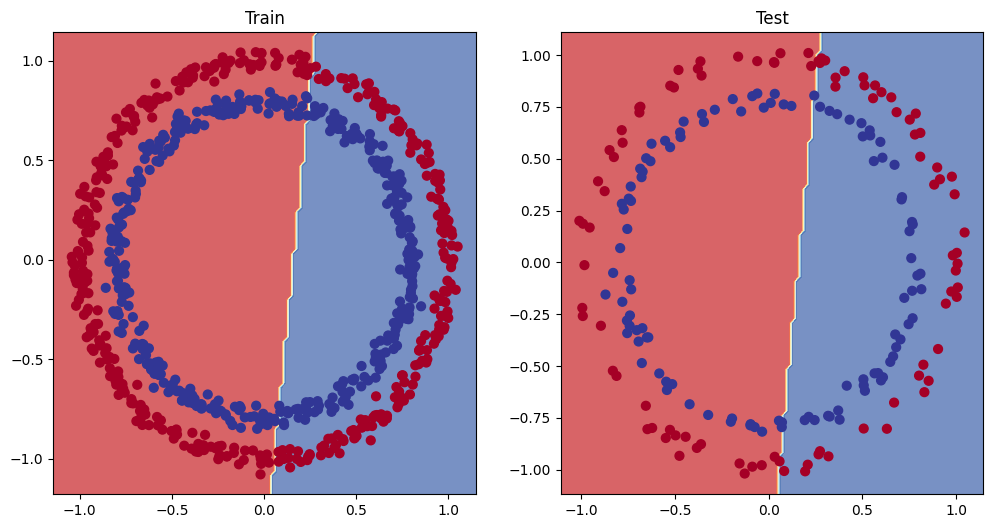

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model0, X_test, y_test)

In [24]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

In [25]:
model1 = CircleModelV1()
model1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [26]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [27]:
X_train

tensor([[ 0.8034, -0.1072],
        [-0.2292,  0.9914],
        [-0.5869, -0.5160],
        ...,
        [ 0.0662,  0.9818],
        [ 0.6385,  0.7925],
        [-0.7636, -0.6481]], device='cuda:0')

In [28]:
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)


def fit(epochs, model, loss_fn, optimizer):
    # X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

    for epoch in range(epochs):
        model1.train()
        y_logits = model(X_train.to(device)).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))
        loss = loss_fn(y_logits, y_train.to(device))
        acc = accuracy_fn(y_train.to(device), y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model1.eval()
        with torch.inference_mode():
            test_logits = model(X_test.to(device)).squeeze()
            test_preds = torch.round(torch.sigmoid((test_logits)))
            test_loss = loss_fn(test_logits, y_test.to(device))
            test_acc = accuracy_fn(y_test.to(device), test_preds)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss: {loss:.2f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.2f} | Test Accuracy: {test_acc:.2f}%")

In [29]:
torch.manual_seed(69)
fit(epochs=1000, model=model1.to(device), loss_fn=loss_fn, optimizer=optimizer)

Epoch 0: Loss: 0.70 | Accuracy: 50.62% | Test Loss: 0.69 | Test Accuracy: 56.00%
Epoch 100: Loss: 0.69 | Accuracy: 50.75% | Test Loss: 0.69 | Test Accuracy: 47.00%
Epoch 200: Loss: 0.69 | Accuracy: 42.62% | Test Loss: 0.70 | Test Accuracy: 36.00%
Epoch 300: Loss: 0.69 | Accuracy: 48.88% | Test Loss: 0.70 | Test Accuracy: 40.50%
Epoch 400: Loss: 0.69 | Accuracy: 50.25% | Test Loss: 0.70 | Test Accuracy: 40.50%
Epoch 500: Loss: 0.69 | Accuracy: 50.38% | Test Loss: 0.70 | Test Accuracy: 41.00%
Epoch 600: Loss: 0.69 | Accuracy: 50.12% | Test Loss: 0.70 | Test Accuracy: 41.00%
Epoch 700: Loss: 0.69 | Accuracy: 50.12% | Test Loss: 0.70 | Test Accuracy: 41.00%
Epoch 800: Loss: 0.69 | Accuracy: 50.00% | Test Loss: 0.70 | Test Accuracy: 41.00%
Epoch 900: Loss: 0.69 | Accuracy: 50.00% | Test Loss: 0.70 | Test Accuracy: 41.00%


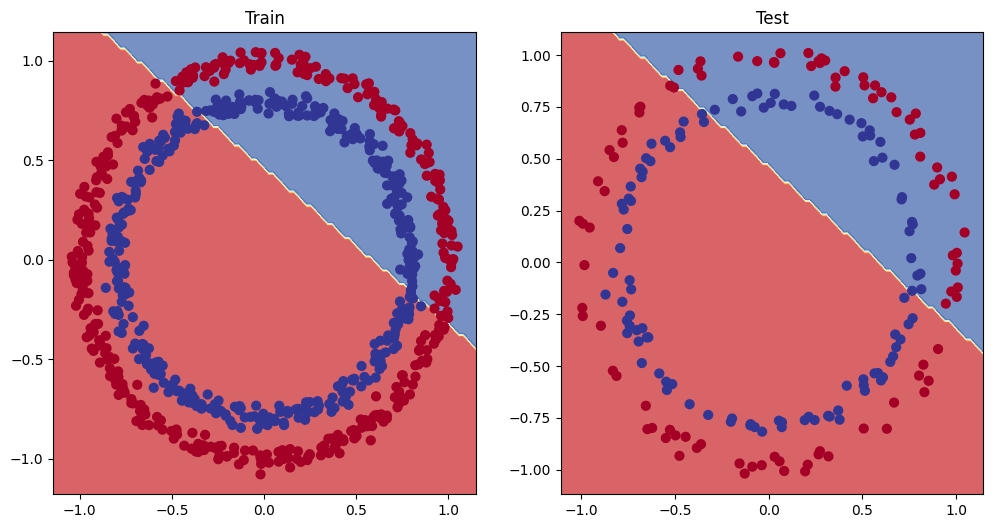

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model1, X_test, y_test)

In [31]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [32]:
model2 = CircleModelV2()
model2

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [33]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

In [34]:
torch.manual_seed(69)
fit(epochs=1000, model=model2.to(device), loss_fn=loss_fn, optimizer=optimizer)

Epoch 0: Loss: 0.70 | Accuracy: 49.25% | Test Loss: 0.69 | Test Accuracy: 53.00%
Epoch 100: Loss: 0.69 | Accuracy: 52.62% | Test Loss: 0.69 | Test Accuracy: 47.50%
Epoch 200: Loss: 0.69 | Accuracy: 53.87% | Test Loss: 0.69 | Test Accuracy: 48.50%
Epoch 300: Loss: 0.68 | Accuracy: 55.00% | Test Loss: 0.69 | Test Accuracy: 50.50%
Epoch 400: Loss: 0.68 | Accuracy: 57.12% | Test Loss: 0.69 | Test Accuracy: 50.00%
Epoch 500: Loss: 0.67 | Accuracy: 57.12% | Test Loss: 0.68 | Test Accuracy: 49.50%
Epoch 600: Loss: 0.66 | Accuracy: 59.88% | Test Loss: 0.68 | Test Accuracy: 50.00%
Epoch 700: Loss: 0.65 | Accuracy: 65.38% | Test Loss: 0.67 | Test Accuracy: 57.50%
Epoch 800: Loss: 0.63 | Accuracy: 71.88% | Test Loss: 0.64 | Test Accuracy: 64.00%
Epoch 900: Loss: 0.58 | Accuracy: 85.25% | Test Loss: 0.60 | Test Accuracy: 81.00%


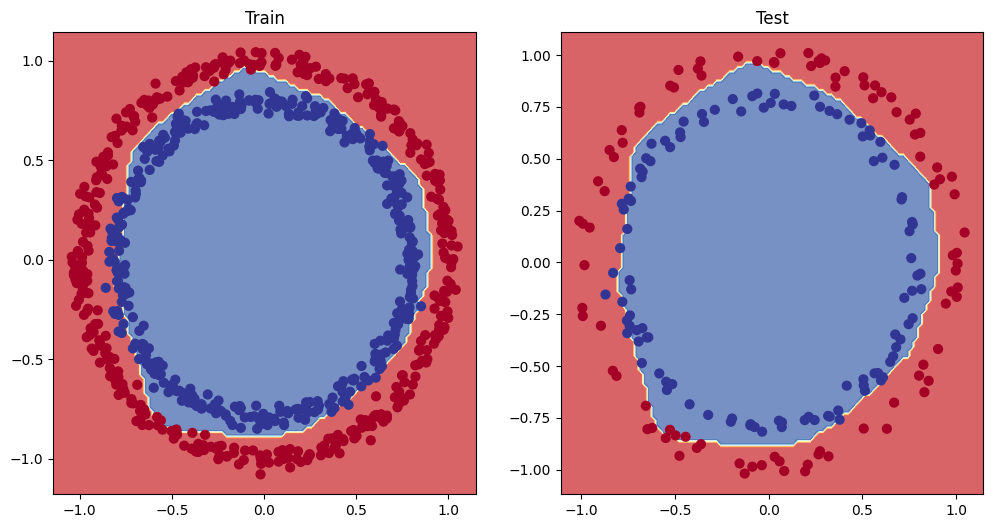

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model2, X_test, y_test)

In [36]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

In [37]:
from sklearn.datasets import make_blobs

In [38]:
X, y = make_blobs(n_samples=1000, n_features=NUM_FEATURES,
                  centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.LongTensor)
print(X[:5], y[:5])

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


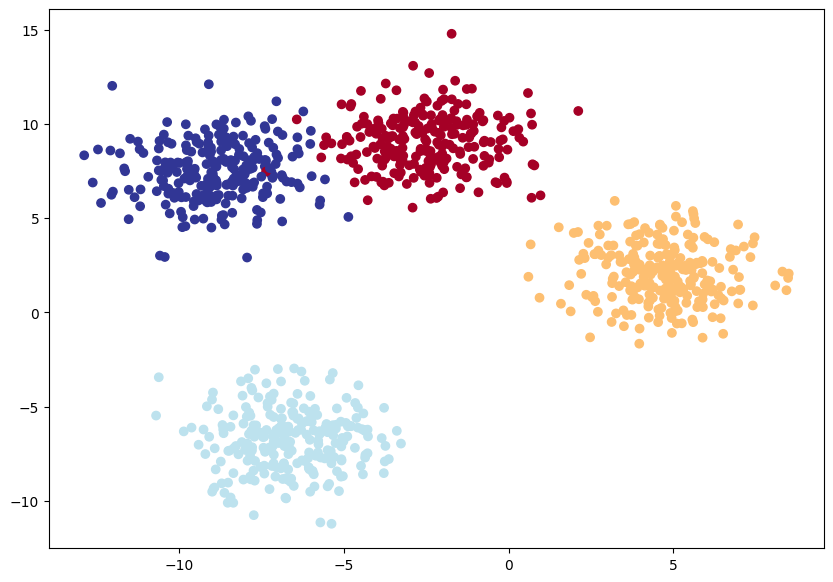

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [40]:
class BlobModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_units=10):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [41]:
model4 = BlobModel(in_features=NUM_FEATURES, out_features=NUM_CLASSES, hidden_units=8).to(device)

In [42]:
model4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model4.parameters(), lr=0.1)

In [44]:
model4(X_train.to(device))[:5]

tensor([[ 0.9604,  0.3405, -0.6575, -0.2381],
        [ 0.5391,  0.1652, -0.6215, -0.1088],
        [-0.6200,  0.7657, -0.5020, -0.7646],
        [-0.6744,  0.3671, -0.4298, -0.4031],
        [ 0.2139,  0.2003, -0.4733,  0.0022]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [45]:
y_logits = model4(X_test.to(device))
y_pred_probs = torch.softmax(y_logits, dim=1)
y_logits[:5], y_pred_probs[:5]

(tensor([[ 0.8533,  0.2169, -0.6619, -0.1291],
         [-0.2796,  0.5143, -0.5335, -0.5015],
         [-0.2254,  0.6277, -0.4710, -0.5190],
         [ 0.7616,  0.3660, -0.4728, -0.1334],
         [ 0.7677,  0.1498, -0.7167, -0.1622]], device='cuda:0',
        grad_fn=<SliceBackward0>),
 tensor([[0.4709, 0.2492, 0.1035, 0.1763],
         [0.2088, 0.4619, 0.1620, 0.1673],
         [0.2051, 0.4814, 0.1605, 0.1530],
         [0.4214, 0.2837, 0.1226, 0.1722],
         [0.4629, 0.2495, 0.1049, 0.1827]], device='cuda:0',
        grad_fn=<SliceBackward0>))

In [46]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [47]:
torch.argmax(y_pred_probs[0])

tensor(0, device='cuda:0')

In [48]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model4.train()

    y_logits = model4(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model4.eval()
    with torch.inference_mode():
        test_logits = model4(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.47937 | Accuracy: 22.00% | Test Loss: 1.27032 | Test Accuracy: 23.50%
Epoch: 100 | Loss: 0.03693 | Accuracy: 99.00% | Test Loss: 0.02878 | Test Accuracy: 99.50%
Epoch: 200 | Loss: 0.02870 | Accuracy: 99.12% | Test Loss: 0.01943 | Test Accuracy: 99.50%
Epoch: 300 | Loss: 0.02654 | Accuracy: 99.12% | Test Loss: 0.01670 | Test Accuracy: 99.50%
Epoch: 400 | Loss: 0.02550 | Accuracy: 99.12% | Test Loss: 0.01540 | Test Accuracy: 99.50%
Epoch: 500 | Loss: 0.02487 | Accuracy: 99.12% | Test Loss: 0.01454 | Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.02440 | Accuracy: 99.12% | Test Loss: 0.01393 | Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.02400 | Accuracy: 99.12% | Test Loss: 0.01343 | Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.02365 | Accuracy: 99.12% | Test Loss: 0.01303 | Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.02333 | Accuracy: 99.12% | Test Loss: 0.01268 | Test Accuracy: 99.50%


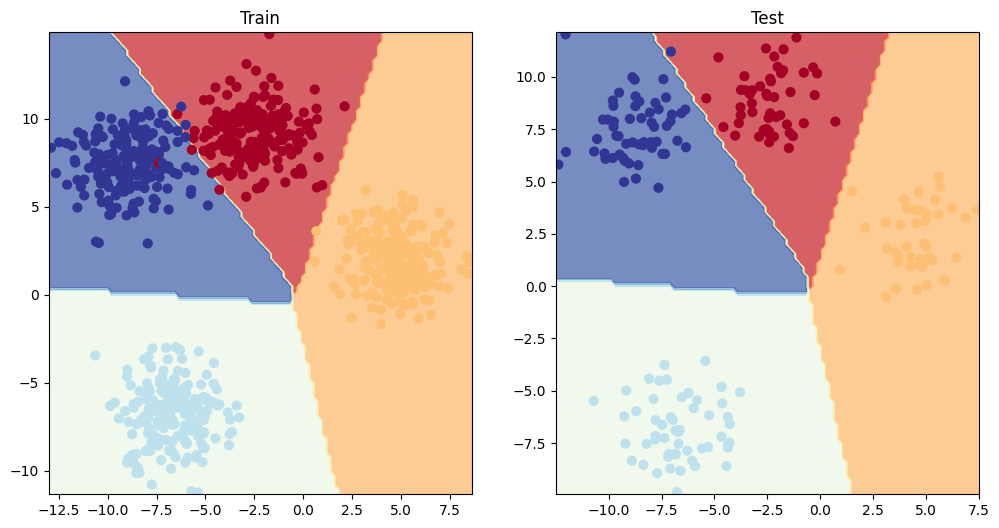

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model4, X_test, y_test)

In [50]:
!pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 10.9 MB/s eta 0:00:00


In [51]:
from torchmetrics import ConfusionMatrix

In [53]:
cfn = ConfusionMatrix(task='multiclass', num_classes=NUM_CLASSES).to(device)
cfn(test_pred, y_test)

tensor([[49,  0,  0,  0],
        [ 0, 41,  0,  0],
        [ 0,  0, 53,  0],
        [ 1,  0,  0, 56]], device='cuda:0')

In [54]:
import numpy as np

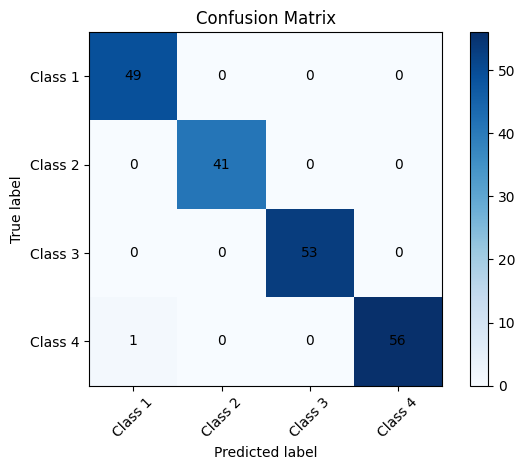

In [62]:
cm_value = cfn.cpu().compute().numpy()
class_labels = [f"Class {i}" for i in range(1, 5)]  # Replace with your actual class labels

plt.imshow(cm_value, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

fmt = '.2f' if cm_value.dtype == 'float32' else 'd'
thresh = cm_value.max()
for i in range(cm_value.shape[0]):
    for j in range(cm_value.shape[1]):
        plt.text(j, i, format(cm_value[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm_value[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()